## Simple code regression model

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

print(tf.__version__)

2.12.0-rc0


In [15]:
# Build a simple Sequential model
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

# Compile the model
model.compile(optimizer='sgd', loss='mean_squared_error')

# Declare model inputs and outputs for training
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

model.fit(xs, ys, epochs=500, verbose=0) # verbose=0 for not printing all epoch data

In [16]:
# prediction
model.predict([10.0])

1/1 [==============================] - 0s 99ms/step


array([[18.985235]], dtype=float32)

### 3-Layer NN for image processing

In [1]:
import tensorflow as tf

fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images=training_images/255.0 
test_images=test_images/255.0 

model = tf.keras.models.Sequential([
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                                    ])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=1)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

313/313 [==============================] - 1s 3ms/step
[2.0428090e-05 3.8504757e-07 5.2018672e-06 1.5654373e-06 1.7363685e-05
 1.1556558e-02 1.9537583e-05 6.9834106e-02 3.5626252e-04 9.1818863e-01]
9


### see training image

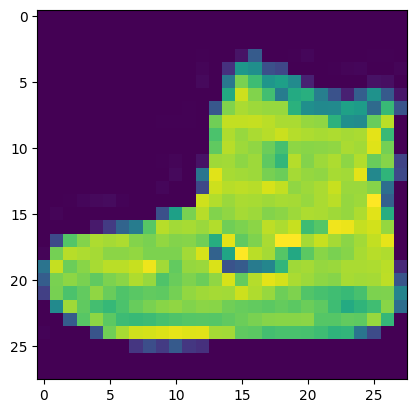

In [2]:
import matplotlib.pyplot as plt

# Visualize the image
plt.imshow(training_images[0])

### see image size in numpy array

In [ ]:
from tensorflow.keras.utils import img_to_array, load_img

image_file = os.path.join(train_horses_dir, os.listdir(train_horses_dir)[0])
sample_image  = load_img(image_file)
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

### Softmax function of TF

In [ ]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

### callback funtiction to stop training if accuracy or loss meets certain thresold

In [6]:
class myCallback(tf.keras.callbacks.Callback):
    
  def on_epoch_end(self, epoch, logs={}):  
    if(logs.get('loss') < 0.4):

      print("\nLoss is lower than 0.4 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

# Following way to use it in model defination
'''
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])
'''

'\nmodel.fit(x_train, y_train, epochs=10, callbacks=[callbacks])\n'

# CNN 

In [ ]:
import tensorflow as tf

# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

# Define the model
model = tf.keras.models.Sequential([
                                                         
  # Add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  # Add the same layers as before
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Print the model summary
model.summary()

# Use same settings
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

### To check how each filter is working in our CNN

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 2

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

### Data generator in TF

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images containing sub-folder of horse and human
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

'''
To use it model:
    model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
            tf.keras.layers.MaxPooling2D(2, 2),
            ...
            ...
'''

'''
To use it model.fit:
        history = model.fit(
                      train_generator,
                      steps_per_epoch=8,  
                      epochs=15,
                      verbose=1)
'''


'''
    For validation_data
    history = model.fit(
                  train_generator,
                  steps_per_epoch=8,  
                  epochs=15,
                  verbose=1,
                  validation_data = validation_generator,
                  validation_steps=8)
'''

In [ ]:
# Sample model for CNN with complex image and data generator

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')  # softmax for multi class 
])



from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',  # sparse_categorical_crossentropy for multi class int labels
                                           # categorical_crossentropy for multi class vector (one-hot-encoded)  
              metrics = ['accuracy'])

history = model.fit(
              train_generator,
              steps_per_epoch=8,  
              epochs=15,
              verbose=1,
              validation_data = validation_generator,
              validation_steps=8)


### some useful os command to check with files

In [ ]:
import os

# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# list filenames under the directory
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

# no of files in directory
print('total training horse images:', len(os.listdir(train_horse_dir)))

### Plot training vs validation accuracy

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'r-', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'r-', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()


#### same above plot using plotly

In [ ]:
import pandas as pd
import plotly.express as px
def ploty_loss_acc(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
    
    df = pd.DataFrame(dict(
        epochs = epochs,
        acc = acc,
        val_acc = val_acc,
        loss = loss,
        val_loss = val_loss
    ))

    fig = px.line(df, x="epochs", y=["acc", "val_acc"], width=600, height=400)
    fig.show()

    fig2 = px.line(df, x="epochs", y=["loss", "val_loss"], width=600, height=400)
    fig2.show()

### Augmentation using dataGenerator function

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

### Data spliting:

In [ ]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  """
  Splits the data into train and test sets
  
  Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training
    
  Returns:
    None
  """
  file_list = os.listdir(SOURCE_DIR)
  total_sample_file_list = random.sample(file_list, len(file_list))
  split_point = int(len(total_sample_file_list) * SPLIT_SIZE)
  for i, file in enumerate(total_sample_file_list):
    file_size = os.path.getsize(os.path.join(SOURCE_DIR,file))
    if file_size == 0:
      print(f'{file} is zero length, so ignoring.')
      continue

    if i < split_point:      
        copyfile(os.path.join(SOURCE_DIR,file), os.path.join(TRAINING_DIR,file))
    else:
        copyfile(os.path.join(SOURCE_DIR,file), os.path.join(VALIDATION_DIR,file))

#### Sample code to call split_data

# Data generator for csv file or numpy array data
## 1. First read data from csv and convert it to matrix

In [ ]:
'''
Csv file has format like below:

label,pix1, pix2,....,pix785
'''
def parse_data_from_input(filename):
  images = []
  labels = []
  with open(filename) as file:
    csv_reader = csv.reader(file, delimiter=',')
    for (i,row) in enumerate(csv_reader):
      if i==0: # to skip first row which have column names
        continue
      lable = np.array(row[0]).astype(np.float64)

      image_vector = row[1:]
      image_matrix = np.reshape(image_vector, (28,28))
      image_matrix = image_matrix.astype(np.float64)
      
      images.append(image_matrix)
      labels.append(lable)
    
    labels = np.array(labels)
    images = np.array(images)


    return images, labels

## 2. Now expanding dimention for matrix and then make a data_generator

In [ ]:
def train_val_generators(training_images, training_labels, validation_images, validation_labels):
  
  # input sample dimention(10000, 28, 28)
  # need to make it (10000, 28, 28, 1)  
  training_images = np.expand_dims(training_images, axis=3)
  validation_images = np.expand_dims(validation_images, axis=3)

  train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


  train_generator = train_datagen.flow(x=training_images,
                                       y=training_labels,
                                       batch_size=32) 

  validation_datagen = ImageDataGenerator( rescale = 1.0/255. )

  validation_generator = validation_datagen.flow(x=validation_images,
                                                 y=validation_labels,
                                                 batch_size=32) 

  return train_generator, validation_generator

## 3. Model for such multiclass data

In [ ]:
from tensorflow.keras.optimizers import RMSprop

def create_model():
  model = model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
  ])

  model.compile(optimizer = RMSprop(learning_rate=0.001),
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model



model = create_model()
history = model.fit(train_generator,
                    epochs=15,
                    validation_data=validation_generator)